

---


# Low Level - Regressão Linear

---



# Corona Vírus

![corona](https://drive.google.com/uc?id=1KvP9wF2gsmDdKRbTQ2uHZnGmhE8Gok7z)

Dados: fonte Ministério da Saúde

In [1]:
#Importando lib numpy
import numpy as np
X = np.array([[1], [5], [10], [15], [20], [25], [30], [35], [40], [45], [50]])
y = np.array([[1],[2], [8], [30], [98], [291], [1128], [2433], [4256], [6836], [11130]])

In [2]:
X

array([[ 1],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50]])

In [3]:
y

array([[    1],
       [    2],
       [    8],
       [   30],
       [   98],
       [  291],
       [ 1128],
       [ 2433],
       [ 4256],
       [ 6836],
       [11130]])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [ ]:
#instalar no ambiente de trabalho a lib scikit-learn (ANACONDA)
from sklearn.preprocessing import StandardScaler
#Como os valores são bem diferentes, vamos trazer eles para o mesmo padrão, fazendo um escalonamento.
scaler_x = StandardScaler() #crio um objeto
X = scaler_x.fit_transform(X) #transfomo os valores de X para valores escalonados

In [ ]:
X

In [ ]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [ ]:
y

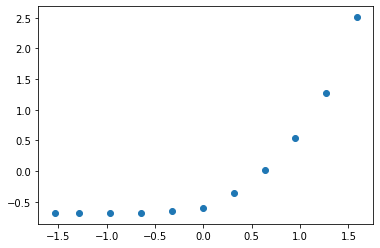

In [9]:
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [12]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
import tensorflow as tf

C:\Users\filip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\filip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\filip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\filip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [ ]:
tf.__version__

In [ ]:
# insiro valores aleatórios nas variaveis de inicio
b0 = tf.Variable(1.0) 
b1 = tf.Variable(0.5)

In [ ]:
# na função MSE precisamos passar 2 parametros, os valores reais e os valores previstos.
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
# para o treinamento vamos usar o Algoritmo de descida do gradiente.
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
# configuro o modelo para encontrar o minimo do erro
treinamento = otimizador.minimize(erro)
# inicializa as variáveis
init = tf.global_variables_initializer()

In [ ]:
# para iniciar o treinamento precisamos criar uma sessão
with tf.Session() as sess:
    # inicializa as variáveis
    sess.run(init)
    # precisamos definir o numero de épocas que nosso algoritmo irá rodar.
    for i in range(1000): # neste caso ele irá fazer o ajuste dos parametros mil vezes.
        sess.run(treinamento)
    # após o treinamento vamos pegar os valores encontrados.
    b0_final, b1_final = sess.run([b0, b1])

In [ ]:
b0_final

In [ ]:
b1_final

# ETAPA DE TREINAMENTO CONCLUIDA.
nesta etapa já temos o algoritmo treinado, e já conseguimos fazer previsões.

In [ ]:
# para verificar os valores calculados.
previsoes = b0_final + b1_final * X
previsoes

In [ ]:
y

In [ ]:
# exibindo os valores calculados e os valores previstos.
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

# Previsão

In [ ]:
# para fazer a previsão de um valor fora da tabela.
# Substituo valor de X
previsao = b0_final + b1_final * 90
previsao

o valor calculado está incoerente com a relação de valores que temos.
isso acontece, pois os valores forão escalonados, e nosso valores de teste não.

In [ ]:
# para resolver esse problema, precisamos escalonar o valor tb.
scaler_x.transform([[90]])

In [ ]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[90]]))
previsao

In [ ]:
y1 = scaler_y.inverse_transform(y)
y1

In [ ]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

In [ ]:
# para podermos analisar os dados gerados, precisamso de métricas.
# dois modelos muito usados são MSE e MAE.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [ ]:
# melhor vizualização do erro.
mae

In [ ]:
# mais utilizado para o alg de treinamento.
mse